In [1]:
# import findspark
# findspark.init('/home/ubuntu/spark')
import pyspark
sc = pyspark.SparkContext(appName="myAppName")

In [2]:
spark = (pyspark.sql.SparkSession
         .builder        
         .appName('myAppName')
         .getOrCreate()
        )

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('ggplot')

def transform_to_df(path, sep_input="\t"):
    return spark.read.csv(path,
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep=sep_input,           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

In [5]:
average_rating_over_year= transform_to_df("averageRating_overyear.csv", ",")

In [6]:
average_rating_over_year.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- titleId: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- averageRating: double (nullable = true)



In [7]:
average_rating_over_year.show(10)

+---+---------+---------+-------------+
|_c0|  titleId|startYear|averageRating|
+---+---------+---------+-------------+
|  0|tt0004272|     1914|          5.8|
|  3|tt0004336|     1914|          5.5|
|  6|tt0005209|     1915|          5.7|
|  7|tt0006204|     1916|          6.2|
|  8|tt0006489|     1916|          5.3|
| 12|tt0006819|     1916|          6.4|
| 17|tt0010060|     1919|          6.7|
| 28|tt0011011|     1920|          5.8|
| 30|tt0011031|     1920|          6.3|
| 38|tt0013224|     1922|          6.8|
+---+---------+---------+-------------+
only showing top 10 rows



In [8]:
pd_year_groups = average_rating_over_year.toPandas()

In [9]:
pd_year_groups.size

919836

In [10]:
dropped_df = pd_year_groups.drop(['titleId', '_c0'], axis=1)
year_groups = dropped_df.groupby('startYear')

In [11]:
averageRatingPerYear = year_groups.mean()

In [12]:
ratings = year_groups.apply(lambda x: x.sample(frac=0.3))

In [13]:
ratings.columns = ['startYear', 'averageRating']
ratings = ratings.reset_index(drop=True)

In [14]:
averageRatingPerYear.index[::5].size

25

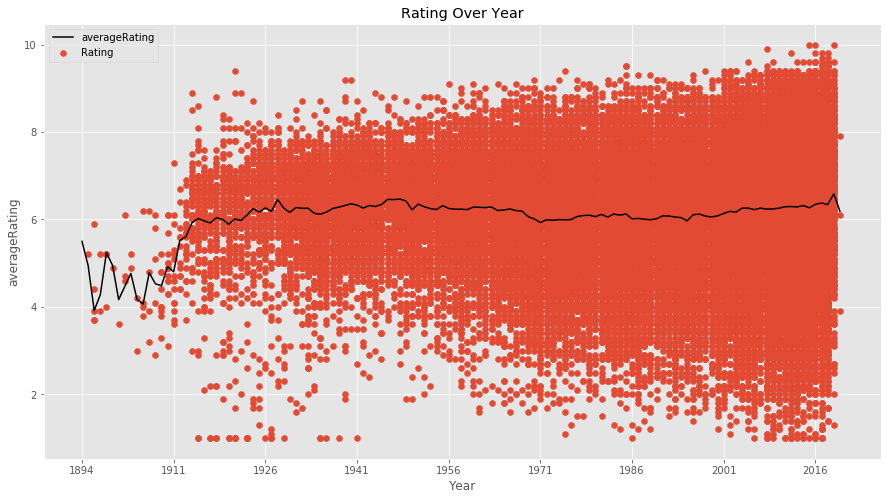

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title("Rating Over Year")
ax.set_ylabel("averageRating")
ax.set_xlabel("Year")

x = averageRatingPerYear.index
y = averageRatingPerYear['averageRating']

plt.plot(x, y, 'k', markevery=25, label="averageRating")
plt.scatter(ratings['startYear'], ratings['averageRating'], label="Rating")
plt.legend(loc='best')
plt.xticks(x[::15])
plt.savefig('rating_over_year.png')
ax